In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
house = pd.read_csv('/Users/user/Desktop/preprocessing/Housing2.csv')
house.shape


(545, 13)

In [3]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,NaN,no,furnished


In [4]:
house.duplicated().sum()
count =house.isnull().sum()
print(count)
print(house.isnull().sum().sum())

price               0
area                0
bedrooms            1
bathrooms           1
stories             1
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     1
parking             2
prefarea            0
furnishingstatus    0
dtype: int64
6


In [5]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,544.000000,544.000000,544.000000,543.000000
mean,4.766729e+06,5150.541284,2.965074,1.284926,1.806985,0.688766
std,1.870440e+06,2170.141023,0.738742,0.501997,0.867601,0.859505
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
numeric_cols=house.select_dtypes(include=['number']).columns
house[numeric_cols]=house[numeric_cols].apply(lambda col: col.fillna(col.mean()))
# for category data
for col in house.select_dtypes(include=['object']).columns:
    house[col].fillna(house[col].mode().iloc[0])
print(house.isnull().sum().sum())
house.isnull().sum()
# house2=house.fillna(value=5)
# house2
# house3=house.fillna(method = 'pad')
# house3=house.ffill()
# house3
# house4=house.bfill()
# house4

1


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     1
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# house=pd.get_dummies(house,columns=house.select_dtypes(include=['boolean']).columns,drop_first=True).astype(int)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for col in house.select_dtypes(include=['object']).columns:
    house[col]=label_enc.fit_transform(house[col])

display(house)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.000000,1,0
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.000000,0,0
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.000000,1,1
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.000000,1,0
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,0.688766,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.000000,0,2
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.000000,0,1
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.000000,0,2
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.000000,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
# normalize between 0,1
scaler=MinMaxScaler()
house[numeric_cols]=scaler.fit_transform(house[numeric_cols])
print(house[numeric_cols].head())

      price      area  bedrooms  bathrooms   stories   parking
0  1.000000  0.396564       0.6   0.333333  0.666667  0.666667
1  0.909091  0.502405       0.6   1.000000  1.000000  1.000000
2  0.909091  0.571134       0.4   0.333333  0.333333  0.666667
3  0.906061  0.402062       0.6   0.333333  0.333333  1.000000
4  0.836364  0.396564       0.6   0.000000  0.333333  0.229589


In [10]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# house[numeric_cols]=scaler.fit_transform(house[numeric_cols])
# print(house[numeric_cols].head())

In [11]:
# house5=house.copy()
num_dtype = house.select_dtypes(include=['number'])
print(num_dtype.dtypes)
house["price"]=house["price"].astype(float)
house["area"]=house["area"].astype(float)
print(house.dtypes)
num_dtype = house.select_dtypes(include=['number'])
print(num_dtype.dtypes)
house
# # num_dt = num_dtype.fillna(num_dtype.mean())
# # house5['parking']= house5["parking"].fillna(house5["parking"].mean())
# house5['bedrooms']= house5["bedrooms"].fillna(house5["bedrooms"].mean())
# house5['bathrooms']= house5["bathrooms"].fillna(house5["bathrooms"].mean())
# house5['stories']= house5["stories"].fillna(house5["stories"].mean())
# house5['airconditioning']=house5['airconditioning'].replace(to_replace=np.nan , value="check it")
# house5

price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking             float64
prefarea              int64
furnishingstatus      int64
dtype: object
price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking             float64
prefarea              int64
furnishingstatus      int64
dtype: object
price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating     

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.229589,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,2
541,0.001485,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1
542,0.000000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,2
543,0.000000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0


In [12]:
# #interpolate 
# house5['parking'] = house5['parking'].interpolate('linear')
# house5['parking']

In [13]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
house.to_csv("preprocessing_final.csv", index=False)

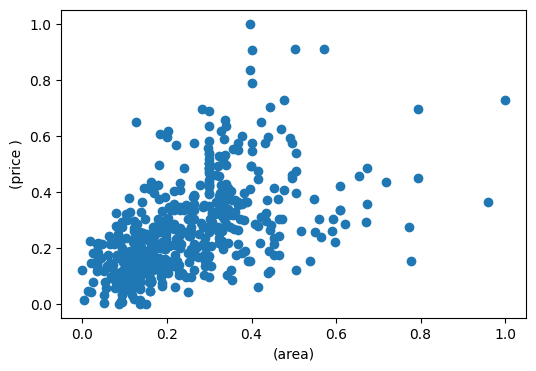

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(house['area'], house['price'])
ax.set_xlabel('(area)')
ax.set_ylabel('(price )')
plt.show()